In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_mnist_data
from logistic_np import add_one, LogisticClassifier
import time
#import pdb

CLASS Softmax


In [2]:
class SoftmaxClassifier(LogisticClassifier):
    def __init__(self, w_shape):
        """__init__
        
        :param w_shape: create w with shape w_shape using normal distribution
        """
        super(SoftmaxClassifier, self).__init__(w_shape)


    def softmax(self, x):
        """softmax
        Compute softmax on the second axis of x
    
        :param x: input
        """
        # [TODO 2.3]
        # Compute softmax
        z_max = np.amax(x, axis=1,keepdims=True)
        zmax = np.subtract(x,z_max,dtype=np.float64)
        soft = np.exp(zmax)
        y_hat = soft / np.sum(soft,axis=1,keepdims=True)
        return y_hat


    def feed_forward(self, x):
        """feed_forward
        This function compute the output of your softmax regression model
        
        :param x: input
        """
        # [TODO 2.3]
        # Compute a feed forward pass
        z=x@self.w
        result=self.softmax(z)
        return result


    def compute_loss(self, y, y_hat):
        """compute_loss
        Compute the loss using y (label) and y_hat (predicted class)

        :param y:  the label, the actual class of the samples
        :param y_hat: the class probabilities of all samples in our data
        """
        # [TODO 2.4]
        # Compute categorical loss
        loss = -1*np.sum(np.multiply(y,np.log(y_hat)))/y.shape[0]
        return loss        


    def get_grad(self, x, y, y_hat):
        """get_grad
        Compute and return the gradient of w

        :param loss: computed loss between y_hat and y in the train dataset
        :param y_hat: predicted y
        """ 
        # [TODO 2.5]
        # Compute gradient of the loss function with respect to w
        grad=(1/y.shape[0])*np.matmul(x.T,(y_hat-y))
        return grad

PLOT

In [3]:
def plot_loss(train_loss, val_loss):
    plt.figure(1)
    plt.clf()
    plt.plot(train_loss, color='b')
    plt.plot(val_loss, color='g')


draw weight


In [4]:
def draw_weight(w):
    label_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    plt.figure(2, figsize=(8, 6))
    plt.clf()
    w = w[0:(28*28),:].reshape(28, 28, 10)
    for i in range(10):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(w[:,:,i], interpolation='nearest')
        plt.axis('off')
        ax.set_title(label_names[i])

NORMALIZE


In [5]:
def normalize(train_x, val_x, test_x):
    """normalize
    This function computes train mean and standard deviation on all pixels then applying data scaling on train_x, val_x and test_x using these computed values
    Note that in this classification problem, the data is already flatten into a shape of (num_samples, image_width*image_height)

    :param train_x: train images, shape=(num_train, image_height*image_width)
    :param val_x: validation images, shape=(num_val, image_height*image_width)
    :param test_x: test images, shape=(num_test, image_height*image_width)
    """
    # [TODO 2.1]
    # train_mean and train_std should have the shape of (1, 1)
    mean_train=np.mean(train_x)
    mean_val=np.mean(val_x)
    mean_test=np.mean(test_x)
    train_x=(train_x-mean_train)/np.std(train_x)
    val_x=(val_x-mean_val)/np.std(val_x)
    test_x=(test_x-mean_test)/np.std(test_x)
    return train_x,val_x,test_x

create one hot

In [6]:
def create_one_hot(labels, num_k=10):
    """create_one_hot
    This function creates a one-hot (one-of-k) matrix based on the given labels

    :param labels: list of labels, each label is one of 0, 1, 2,... , num_k - 1
    :param num_k: number of classes we want to classify
    """
    # [TODO 2.2]
    # Create the one-hot label matrix here based on labels
    one_hot=np.zeros((labels.size,num_k))
    one_hot[np.arange(labels.size),labels]=1
    return one_hot

TEST


In [15]:
def test(y_hat, test_y):
    """test
    Compute the confusion matrix based on labels and predicted values 

    :param classifier: the trained classifier
    :param y_hat: predicted probabilites, output of classifier.feed_forward
    :param test_y: test labels
    """
    
    confusion_mat = np.zeros((10,10))
    # [TODO 2.7]
    # Compute the confusion matrix here

    # confusion_mat = confusion_mat/np.sum(confusion_mat,axis=1)
    for i in range(confusion_mat.shape[0]):
        confusion_mat[i,i]=
    np.set_printoptions(precision=2)
    print('Confusion matrix:')
    print(confusion_mat)
    print('Diagonal values:')
    print(confusion_mat.flatten()[0::11])

MAIN

Reading fashion MNIST data...
<class 'numpy.ndarray'>
Done reading


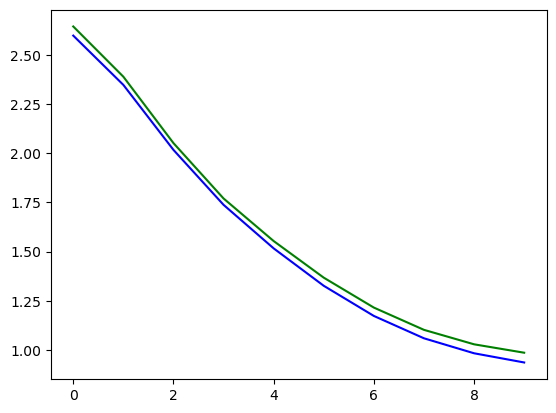

Epoch 10: loss is 0.98587
train_loss:  0.9362123219884215


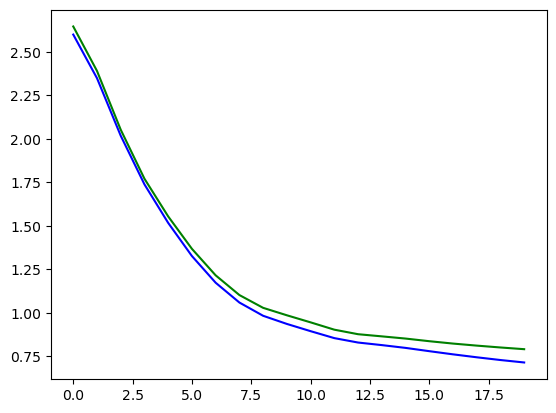

Epoch 20: loss is 0.79109
train_loss:  0.7147433189082126


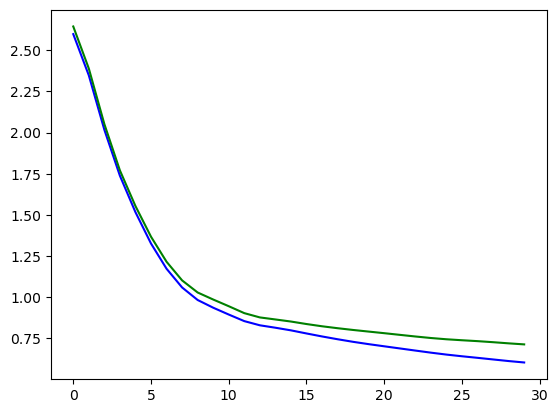

Epoch 30: loss is 0.71331
train_loss:  0.6033853752397462


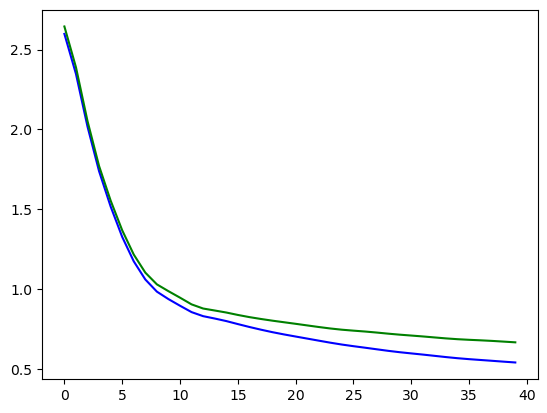

Epoch 40: loss is 0.66523
train_loss:  0.5389874917989149


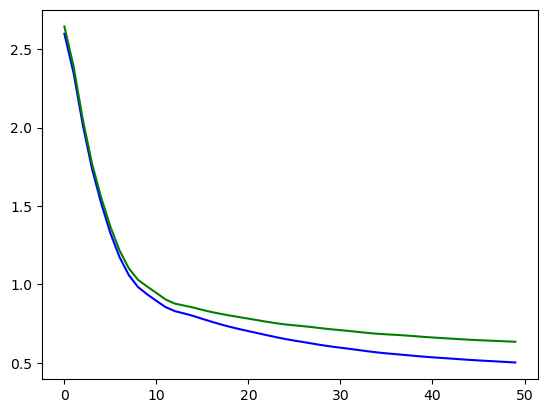

Epoch 50: loss is 0.63359
train_loss:  0.5016503853431188


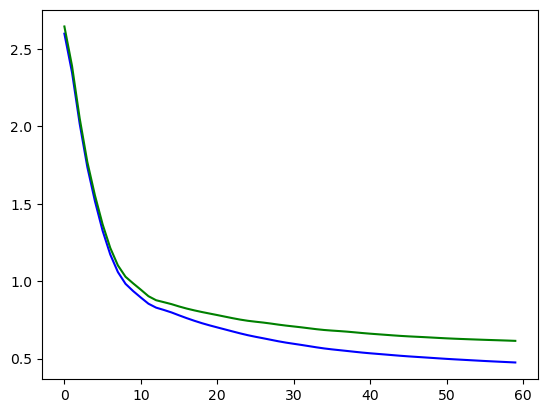

Epoch 60: loss is 0.61477
train_loss:  0.4751533382254361


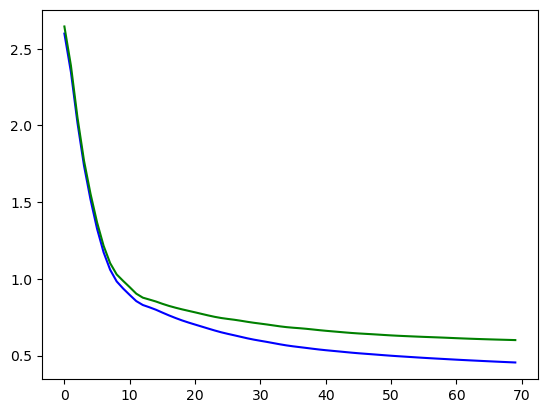

Epoch 70: loss is 0.60052
train_loss:  0.45453515980222564


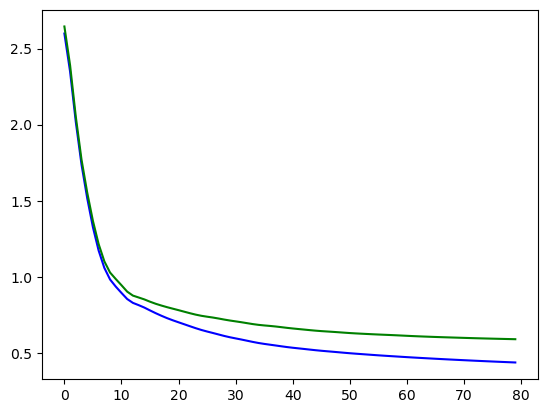

Epoch 80: loss is 0.59059
train_loss:  0.43771796364413657


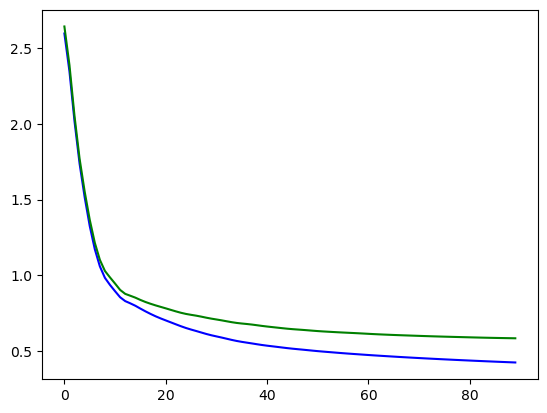

Epoch 90: loss is 0.58339
train_loss:  0.42342512859293957


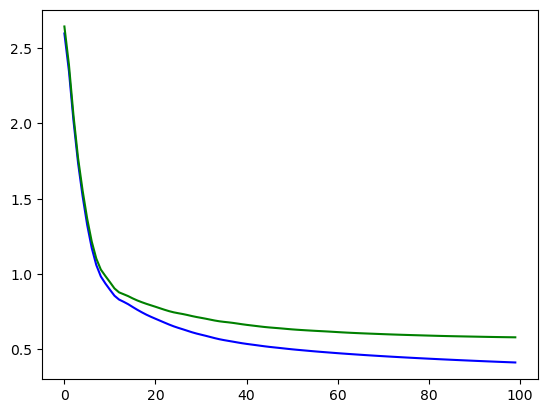

Epoch 100: loss is 0.57828
train_loss:  0.41094429111727476


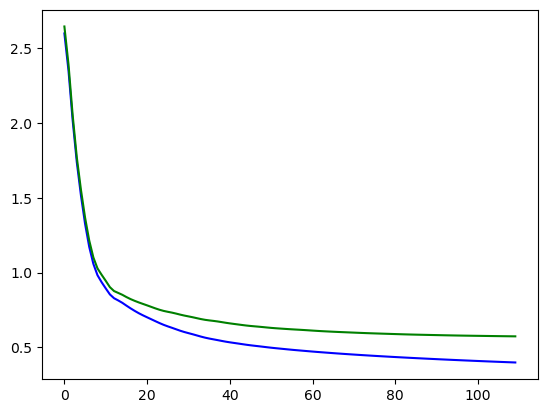

Epoch 110: loss is 0.57451
train_loss:  0.39989604468536916


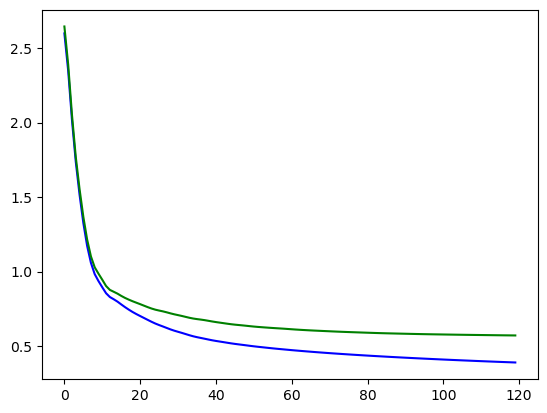

Epoch 120: loss is 0.57140
train_loss:  0.3900059734298241


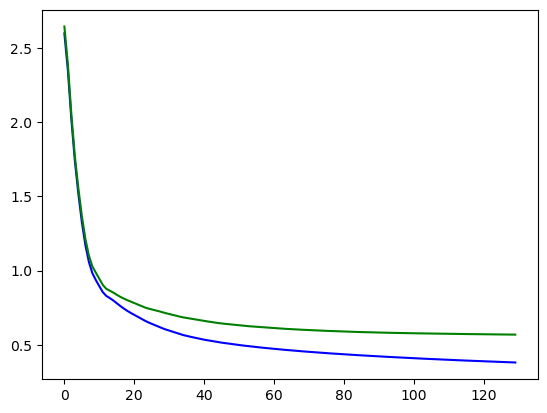

Epoch 130: loss is 0.56872
train_loss:  0.3810571311587006


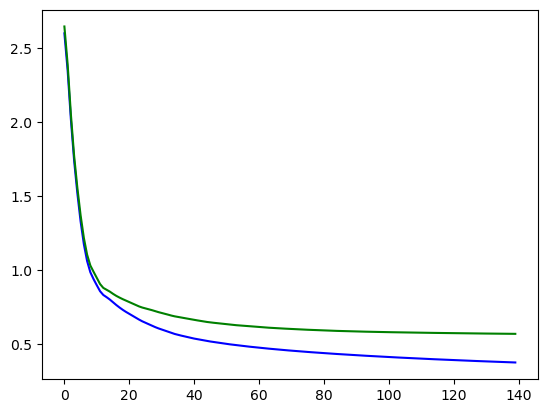

Epoch 140: loss is 0.56650
train_loss:  0.37288154719759625


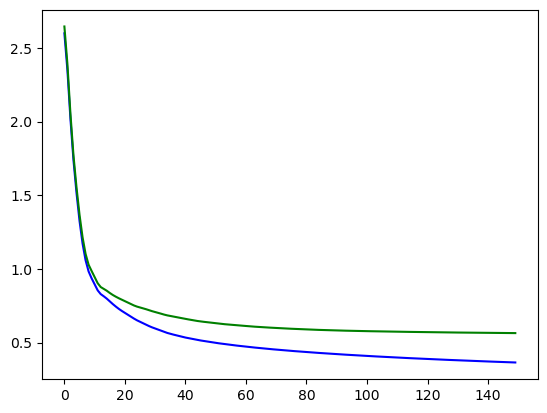

Epoch 150: loss is 0.56465
train_loss:  0.36535209768690413


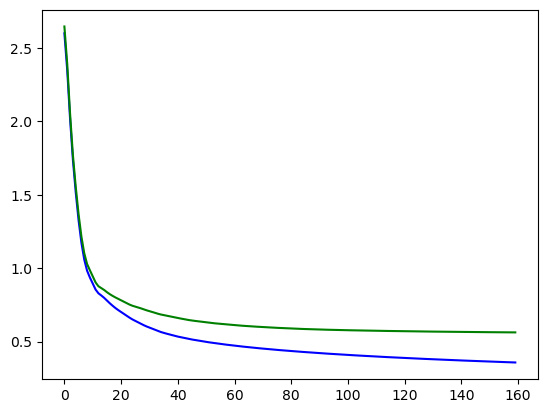

Epoch 160: loss is 0.56311
train_loss:  0.35837341651599425


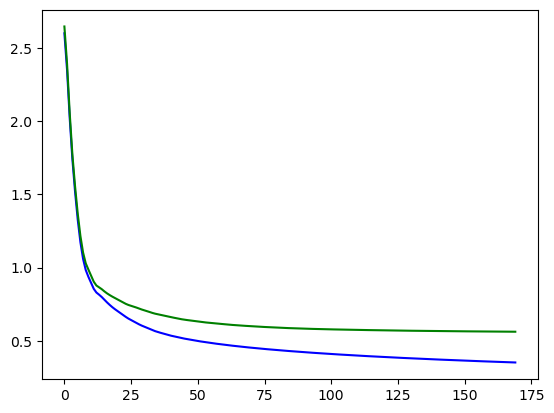

Epoch 170: loss is 0.56176
train_loss:  0.35187166562515837


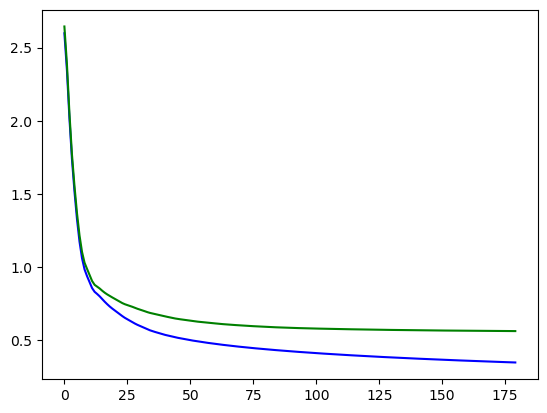

Epoch 180: loss is 0.56056
train_loss:  0.3457874628796803


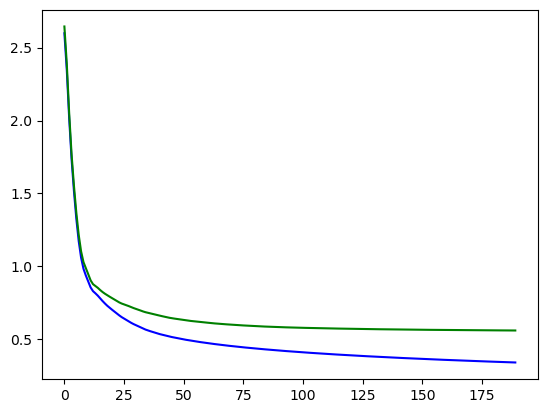

Epoch 190: loss is 0.55951
train_loss:  0.3400719307675659


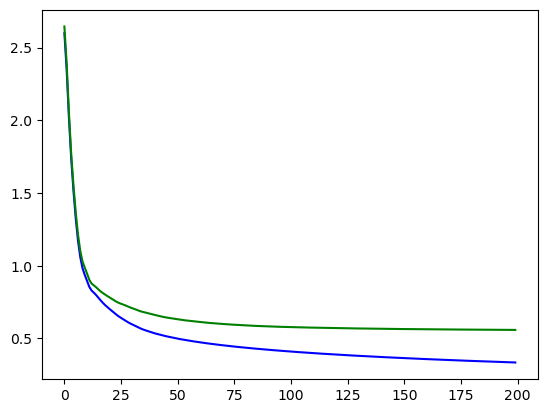

Epoch 200: loss is 0.55858
train_loss:  0.3346842028139099


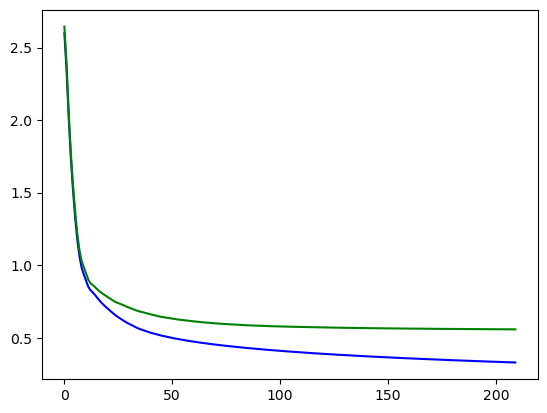

Epoch 210: loss is 0.55775
train_loss:  0.32958970522916664


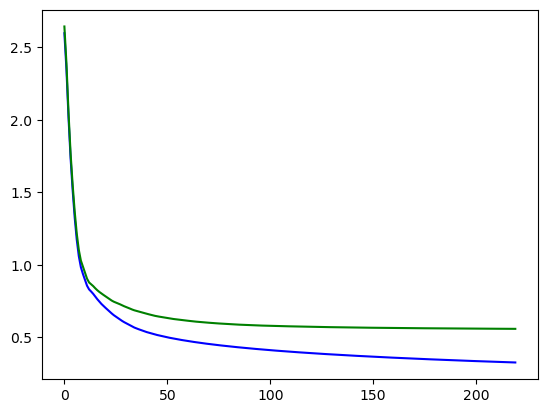

Epoch 220: loss is 0.55702
train_loss:  0.32475892514715526


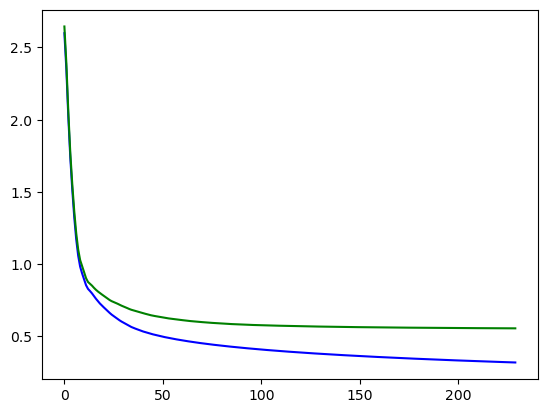

Epoch 230: loss is 0.55638
train_loss:  0.32016648516911733


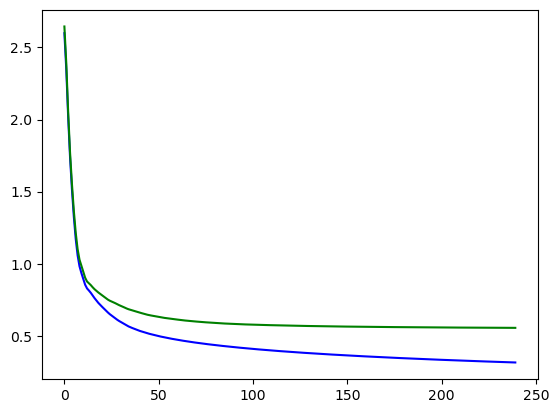

Epoch 240: loss is 0.55581
train_loss:  0.31579042180193306


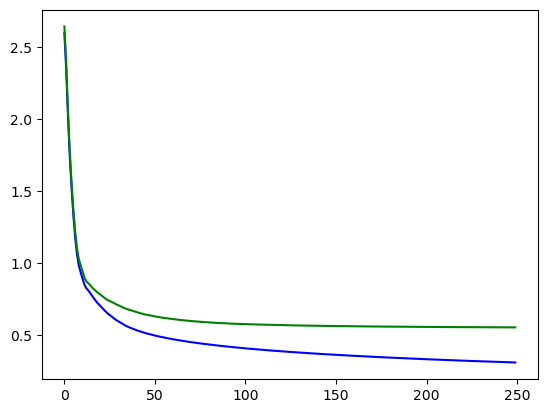

Epoch 250: loss is 0.55531
train_loss:  0.31161161273056853


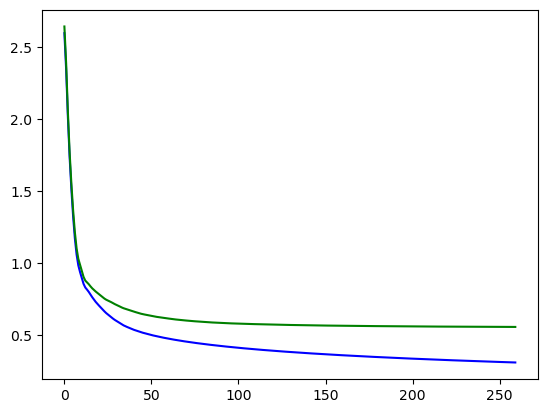

Epoch 260: loss is 0.55488
train_loss:  0.3076133182440288


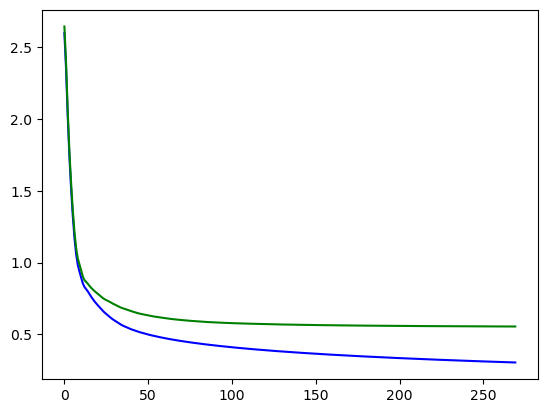

Epoch 270: loss is 0.55451
train_loss:  0.30378081122601247


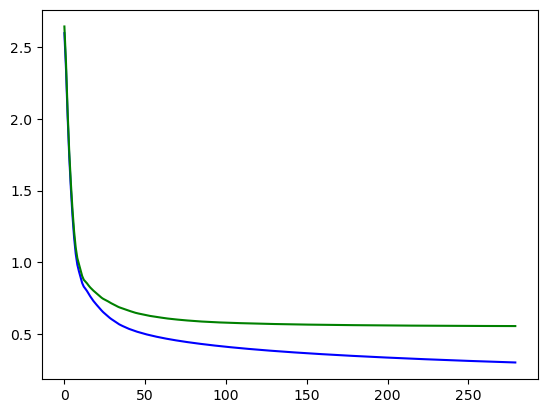

Epoch 280: loss is 0.55419
train_loss:  0.30010107588369506


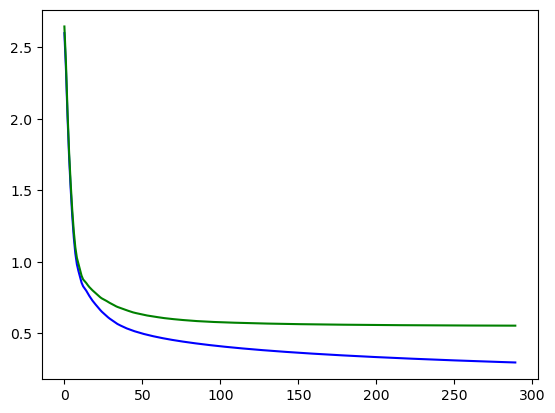

Epoch 290: loss is 0.55392
train_loss:  0.2965625602123825


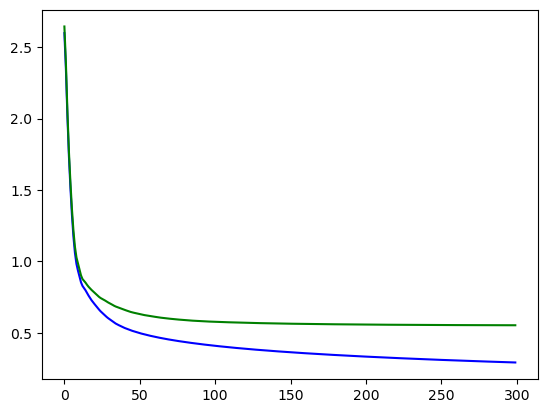

Epoch 300: loss is 0.55370
train_loss:  0.2931549709378879


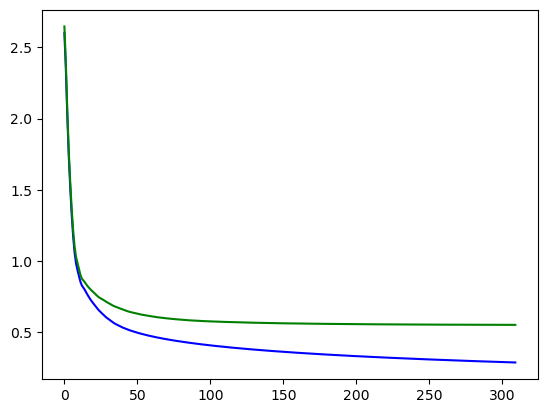

Epoch 310: loss is 0.55353
train_loss:  0.2898691024171819


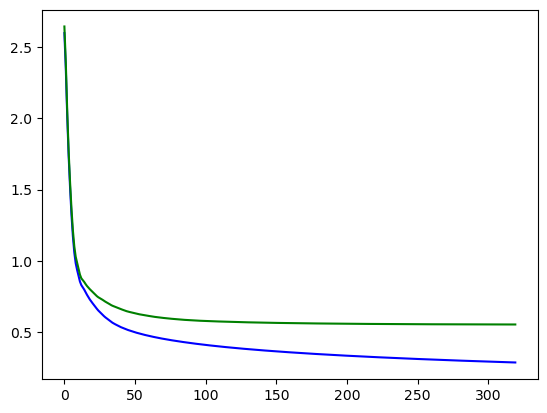

Epoch 320: loss is 0.55339
train_loss:  0.28669669294414346


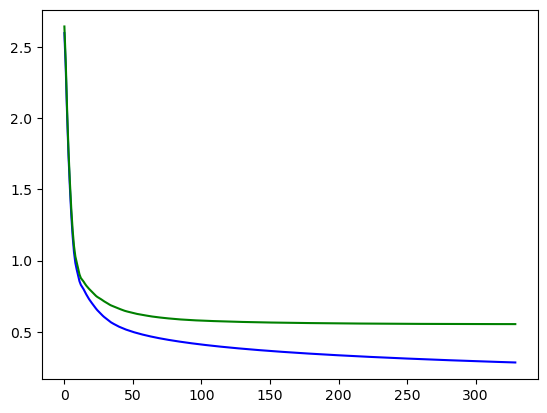

Epoch 330: loss is 0.55330
train_loss:  0.2836303033653863


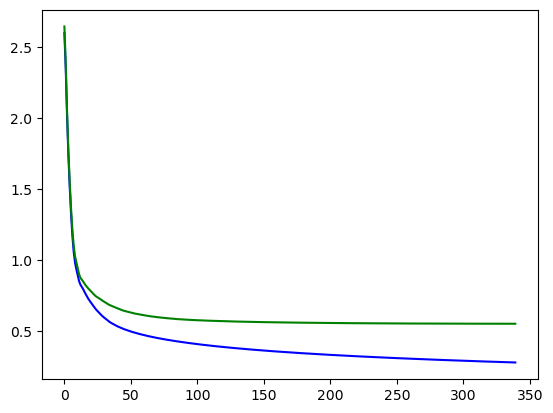

Epoch 340: loss is 0.55324
train_loss:  0.280663214005575


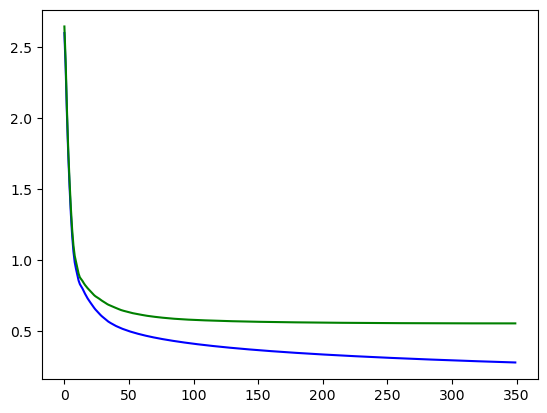

Epoch 350: loss is 0.55322
train_loss:  0.2777893367255282
0.553215142952021
0.5532151359594595
Epoch 353: loss is 0.55322


In [8]:
if __name__ == "__main__":
    np.random.seed(2020)

    # Load data from file
    # Make sure that fashion-mnist/*.gz files is in data/
    train_x, train_y, val_x, val_y, test_x, test_y = get_mnist_data()
    num_train = train_x.shape[0]
    num_val = val_x.shape[0]
    num_test = test_x.shape[0]  

    #generate_unit_testcase(train_x.copy(), train_y.copy()) 

    # Convert label lists to one-hot (one-of-k) encoding
    train_y = create_one_hot(train_y)
    val_y = create_one_hot(val_y)
    test_y = create_one_hot(test_y)

    # Normalize our data
    train_x, val_x, test_x = normalize(train_x, val_x, test_x)
    
    # Pad 1 as the last feature of train_x and test_x
    train_x = add_one(train_x) 
    val_x = add_one(val_x)
    test_x = add_one(test_x)
    
    # Create classifier
    num_feature = train_x.shape[1]
    dec_classifier = SoftmaxClassifier((num_feature, 10))
    momentum = np.zeros_like(dec_classifier.w)

    # Define hyper-parameters and train-related parameters
    num_epoch = 3000#3347
    learning_rate = 0.01
    momentum_rate = 0.9
    epochs_to_draw = 10
    all_train_loss = []
    all_val_loss = []
    plt.ion()
    loss_old=loss_new=0
    for e in range(num_epoch):    
        train_y_hat = dec_classifier.feed_forward(train_x)
        val_y_hat = dec_classifier.feed_forward(val_x)
        train_loss = dec_classifier.compute_loss(train_y, train_y_hat)
        val_loss = dec_classifier.compute_loss(val_y, val_y_hat)

        grad = dec_classifier.get_grad(train_x, train_y, train_y_hat)
        # dec_classifier.numerical_check(train_x, train_y, grad)
        # Updating weight: choose either normal SGD or SGD with momentum
        # dec_classifier.update_weight(grad, learning_rate)
        momentum=dec_classifier.update_weight_momentum(grad, learning_rate, momentum, momentum_rate)
        all_train_loss.append(train_loss) 
        if len(all_val_loss)>2:
            loss_old=all_val_loss[-1]
        all_val_loss.append(val_loss)
        loss_new=all_val_loss[-1]
        # [TODO 2.6]
        # Propose your own stopping condition here
        if loss_new>loss_old and e>2:
            print(loss_new)
            print(loss_old)
            print("Epoch %d: loss is %.5f" % (e+1, val_loss))
            break
        if (e % epochs_to_draw == epochs_to_draw-1):
            plot_loss(all_train_loss,all_val_loss)
            plt.show()
            plt.pause(0.1)
            print("Epoch %d: loss is %.5f" % (e+1, val_loss))
            print("train_loss: ",train_loss)

    y_hat = dec_classifier.feed_forward(test_x)
    # test(y_hat, test_y)

In [16]:
test(y_hat, test_y)

Confusion matrix:
[[9.12e-02 1.06e-03 1.55e-03 6.71e-03 4.82e-04 6.07e-05 2.13e-02 5.20e-06
  8.11e-04 8.09e-07]
 [1.15e-03 1.08e-01 1.06e-03 2.23e-03 1.11e-03 1.00e-05 4.41e-04 4.98e-06
  7.00e-05 9.23e-08]
 [2.00e-03 3.58e-04 5.19e-02 2.05e-03 1.26e-02 1.14e-04 1.11e-02 8.35e-06
  5.84e-04 9.54e-07]
 [2.77e-03 6.04e-03 3.13e-03 6.07e-02 5.30e-03 2.66e-04 3.03e-03 6.28e-05
  1.91e-03 3.57e-07]
 [5.85e-04 1.83e-04 1.85e-02 3.03e-03 5.44e-02 4.10e-05 1.93e-02 6.03e-06
  1.53e-03 3.78e-07]
 [3.67e-05 1.64e-06 2.07e-05 6.38e-05 1.13e-04 8.83e-02 4.08e-04 8.35e-03
  3.01e-03 3.17e-03]
 [1.13e-02 2.44e-04 1.50e-02 4.40e-03 1.15e-02 2.02e-04 4.84e-02 2.34e-05
  1.72e-03 6.72e-06]
 [2.78e-05 2.44e-05 5.94e-06 1.15e-04 4.20e-06 1.24e-02 6.56e-05 7.68e-02
  7.21e-04 4.66e-03]
 [8.97e-04 1.14e-05 8.24e-04 6.82e-04 5.57e-04 1.59e-03 1.95e-03 2.95e-04
  9.70e-02 9.74e-05]
 [4.42e-06 2.70e-05 1.09e-05 2.10e-05 2.64e-06 2.96e-03 2.35e-05 1.25e-02
  6.00e-04 9.01e-02]]
Diagonal values:
[0.09 0.11 0.0